# CNN

In [265]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

mpl.rcParams['axes.labelsize'] = 15

## Fashion MNIST Image Classification
 There are 60,000 training examples and 10,000 iamges for testing. Each image falls into one of the following 10 categories.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Dataset

| Name  | Content | Examples | Size | Link | MD5 Checksum|
| --- | --- |--- | --- |--- |--- |
| `train-images-idx3-ubyte.gz`  | training set images  | 60,000|26 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz)|`8d4fb7e6c68d591d4c3dfef9ec88bf0d`|
| `train-labels-idx1-ubyte.gz`  | training set labels  |60,000|29 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz)|`25c81989df183df01b3e8a0aad5dffbe`|
| `t10k-images-idx3-ubyte.gz`  | test set images  | 10,000|4.3 MBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz)|`bef4ecab320f06d8554ea6380940ec79`|
| `t10k-labels-idx1-ubyte.gz`  | test set labels  | 10,000| 5.1 KBytes | [Download](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz)|`bb300cfdad3c16e7a12a480ee83cd310`|



In [266]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

label = ['T-shirt/top',  'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
         'Sneaker', 'Bag', 'Ankle boot']

In [267]:
data_dir = './'
X_train, y_train = load_mnist(data_dir, kind='train')
X_test, y_test = load_mnist(data_dir, kind='t10k')

X_train = X_train.astype(np.float32) / 256.0
X_test = X_test.astype(np.float32) / 256.0

print("The training dataset is a {}x{} matrix.".format(X_train.shape[0], X_train.shape[1]))
print("The test dataset contains {} examples.".format(len(y_test)))

The training dataset is a 60000x784 matrix.
The test dataset contains 10000 examples.


## Logistic Regression


In [6]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [1]:
batch_size=128
epochs=100
num_class=10

model=Sequential()
model.add(Dense(512, input_shape=(784,),activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_class,activation='softmax'))

model.summary()

NameError: name 'Sequential' is not defined

In [92]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',optimizer=SGD(momentum=0.9),metrics=['accuracy'])

In [93]:
y_train_new=keras.utils.to_categorical(y_train, num_classes=num_class)
y_test_new=keras.utils.to_categorical(y_test, num_classes=num_class)

In [95]:
history=model.fit(X_train, y_train_new, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test_new))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.6114 - acc: 0.7879 - val_loss: 0.5035 - val_acc: 0.8201
Epoch 2/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.4215 - acc: 0.8508 - val_loss: 0.4560 - val_acc: 0.8370
Epoch 3/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.3767 - acc: 0.8650 - val_loss: 0.4149 - val_acc: 0.8472
Epoch 4/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.3506 - acc: 0.8746 - val_loss: 0.3775 - val_acc: 0.8669
Epoch 5/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.3286 - acc: 0.8811 - val_loss: 0.3805 - val_acc: 0.8613
Epoch 6/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.3136 - acc: 0.8874 - val_loss: 0.3586 - val_acc: 0.8715
Epoch 7/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2988 - acc: 0.8920 - val_loss: 0.3497 - 

In [96]:
loss = history.history.values()
import numpy as np
num_epochs=np.arange(1,101)

In [97]:
los=np.array(list(loss))
num_epochs=np.array(num_epochs)

In [98]:
los=los.T

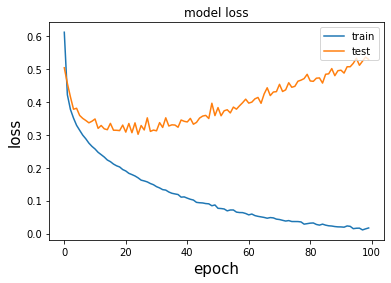

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

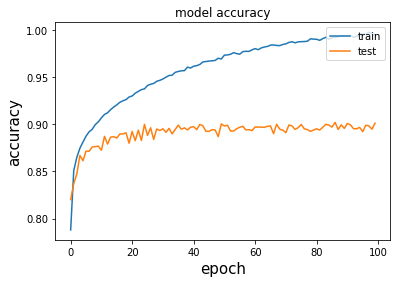

In [100]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Taking a subset 

In [298]:
Xtrain=X_train[:9000]
ytrain=y_train[:9000]
Xtest=X_test[:4000]
ytest=y_test[:4000]

In [299]:
X_train_new=[]
y_train_neww=[]
X_test_new=[]
y_test_neww=[]

In [300]:
for i in ytrain:
    if i==2:
        X_train_new.append(Xtrain[i])
        y_train_neww.append(1)
    if i==7:
        X_train_new.append(Xtrain[i])
        y_train_neww.append(-1)

In [301]:
for i in ytest:
    if i==2:
        X_test_new.append(Xtest[i])
        y_test_neww.append(1)
    if i==7:
        X_test_new.append(Xtest[i])
        y_test_neww.append(-1)

In [302]:
X_train_new=np.array(X_train_new)
y_train_neww=np.array(y_train_neww)
X_test_new=np.array(X_test_new)
y_test_neww=np.array(y_test_neww)

In [303]:
acc=[]

## Logistic Regression

In [304]:
from sklearn.linear_model import LogisticRegression

In [305]:
logreg= LogisticRegression()
logreg.fit(X_train_new,y_train_neww)
y_pred=logreg.predict(X_test_new)

D:\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [306]:
correct=0
j=0
for i in y_pred:
    if i==y_test_neww[j]:
        correct=correct+1
    j=j+1

correct=correct/len(y_test_neww)

In [307]:
acc.append(correct)
correct

1.0

## SVC

In [308]:
from sklearn.svm import SVC

In [309]:
svc= SVC(kernel='linear')
svc.fit(X_train_new,y_train_neww)
y_pred=svc.predict(X_test_new)

In [310]:
from sklearn.metrics import accuracy_score

In [311]:
accuracy_score(y_test_neww,y_pred)

0.49939540507859737

In [312]:
correct=0
j=0
for i in y_pred:
    if i==y_test_neww[j]:
        correct=correct+1
    j=j+1

correct=correct/len(y_test_neww)

In [313]:
acc.append(correct)
correct

0.49939540507859737

## KNeighborsClassifier

In [314]:
from sklearn.neighbors import KNeighborsClassifier

In [315]:
clf= KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train_new,y_train_neww)
y_pred=clf.predict(X_test_new)

In [316]:
correct=0
j=0
for i in y_pred:
    if i==y_test_neww[j]:
        correct=correct+1
    j=j+1

correct=correct/len(y_test_neww)

In [317]:
acc.append(correct)
correct

0.49939540507859737

## DecisionTreeClassifier

In [318]:
from sklearn.tree import DecisionTreeClassifier

In [319]:
clf= DecisionTreeClassifier()
clf.fit(X_train_new,y_train_neww)
y_pred=clf.predict(X_test_new)

In [320]:
correct=0
j=0
for i in y_pred:
    if i==y_test_neww[j]:
        correct=correct+1
    j=j+1

correct=correct/len(y_test_neww)

In [321]:
acc.append(correct)
correct

1.0

In [322]:
x=np.arange(1,5)

In [324]:
label=['Logistic Regression','SVC','KNeighbors','Decision Trees']

<function matplotlib.pyplot.show(*args, **kw)>

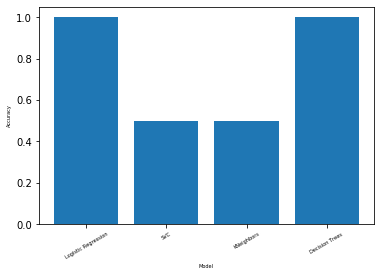

In [326]:
plt.bar(x,acc)
plt.xlabel('Model', fontsize=5)
plt.ylabel('Accuracy', fontsize=5)
plt.xticks(x, label, fontsize=5, rotation=30)
plt.show

### Convolutional Neural Network with the following architecture:
- Convolutional Layer with 32 filters with size of 3x3
- ReLU activation function
- 2x2 MaxPooling
- Convolutional Layer with 64 filters with size of 3x3
- ReLU activation function
- 2x2 MaxPooling
- Fully connected layer with 512 units and ReLU activation function
- Softmax activation layer for output layer




In [327]:

model=Sequential()
model.add(keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [328]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               410112    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total para

In [329]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [330]:
y_train_new=keras.utils.to_categorical(y_train, num_classes=10)
y_test_new=keras.utils.to_categorical(y_test, num_classes=10)

In [331]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255.0
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255.0

In [332]:
model.fit(X_train,y_train_new,epochs=100,validation_data=(X_test,y_test_new))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 5248/60000 [=>............................] - ETA: 35s - loss: 2.3024 - acc: 0.10

KeyboardInterrupt: 

In [79]:
y_pred=model.predict(X_test)

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

